# Supervised evaluation

In [1]:
import sys
sys.path.append("/Users/alessiogandelli/dev/internship/BERTopic_evaluation/src/utils")
from supervised import Supervised
from supervised import get_test_dataset

2023-03-22 16:05:13.400170: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = get_test_dataset('./../../data/simple_supervised/')
df_no_hash = df.copy()
df_no_hash['text'] = df_no_hash['text'].str.replace(r'#\S+', '', case=False)

getting dataset


In [3]:
#%%
bert = Supervised(df, 'all-MiniLM-L6-v2')
openai_eval = Supervised(df, 'openai')

bert_no_hash = Supervised(df_no_hash, 'all-MiniLM-L6-v2')
openai_no_hash = Supervised(df_no_hash, 'openai')



evaluate all-MiniLM-L6-v2
btc 200 0 0
trump 198 2 0
climatechange 195 5 0
war 195 5 0
formula1 290 3 0
evaluate openai
btc 200 0 0
trump 197 3 0
climatechange 195 5 0
war 197 3 0
formula1 278 15 0
evaluate all-MiniLM-L6-v2
btc 67 133 100
trump 171 29 20
climatechange 130 70 52
war 151 49 31
formula1 192 101 87
evaluate openai
btc 140 60 37
trump 172 28 10
climatechange 176 24 8
war 160 40 7
formula1 250 43 13


In [15]:
bert.get_accuracy()
bert.df

btc 140 60 42
trump 169 31 15
climatechange 174 26 11
war 146 54 23
formula1 249 44 22


,text,lang,topic,my_topics,my_probs
1638197080349896704,"The latest The Android, iOS, IoT, Game Console...",en,btc,-1,0.000000
1638197074058518528,was born in the 2008 financial crisis to prot...,en,btc,4,1.000000
1638197035408007170,price update: $BNB $336.68 USD 0.01203 BTC 0....,en,btc,4,0.744640
1638197033394733058,🦁 SHIBARIUM K9 | UPDATE X2 🦁HEY LIONS!Shibariu...,en,btc,4,0.837448
1638197020228812800,Dm For sales ~ B,en,btc,-1,0.000000
...,...,...,...,...,...
1638033178068918273,It absolutely ASTOUNDS me that not a single on...,en,formula1,0,0.949103
1638032815236284417,Massage in Riyadh 24 hoursFull home massage se...,en,formula1,0,0.590349
1638032320845303809,@FM1_3316 He’s gonna prove a lot of people wro...,en,formula1,0,0.922109
1638029207916670976,Watching Fernando Alonso like a kid in a candy...,en,formula1,0,0.627974


<AxesSubplot: xlabel='my_topics', ylabel='topic'>

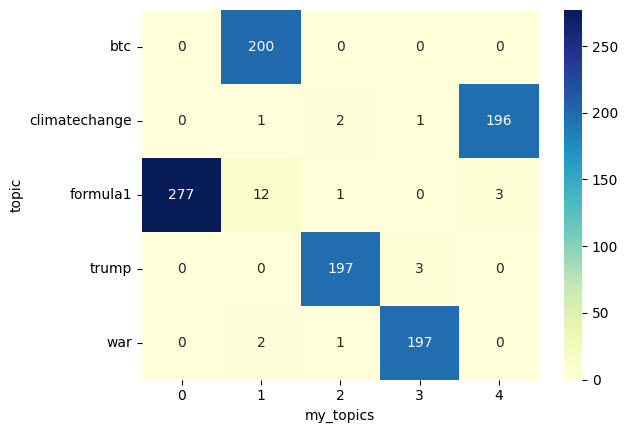

In [22]:
bert.visualize_heatmap()

In [30]:
bert_no_hash = Supervised(df_no_hash, 'all-MiniLM-L6-v2')

evaluate all-MiniLM-L6-v2
btc 112 88 112
trump 170 30 22
climatechange 124 76 50
war 151 49 33
formula1 192 101 88


In [31]:
bert_no_hash.accuracy_no_outliers

{'btc': 1.2727272727272727,
 'trump': 0.9550561797752809,
 'climatechange': 0.8266666666666667,
 'war': 0.9041916167664671,
 'formula1': 0.9365853658536586}

In [43]:
openai_no_hash.get_accuracy()
openai_no_hash.accuracy_no_outliers

btc 112 88 112
trump 170 30 22
climatechange 124 76 50
war 151 49 33
formula1 192 101 88


{'btc': 1.2727272727272727,
 'trump': 0.9550561797752809,
 'climatechange': 0.8266666666666667,
 'war': 0.9041916167664671,
 'formula1': 0.9365853658536586}

In [41]:
bert_no_hash.get_accuracy()
bert_no_hash.accuracy_no_outliers

btc 112 88 112
trump 170 30 22
climatechange 124 76 50
war 151 49 33
formula1 192 101 88


{'btc': 1.2727272727272727,
 'trump': 0.9550561797752809,
 'climatechange': 0.8266666666666667,
 'war': 0.9041916167664671,
 'formula1': 0.9365853658536586}

In [4]:
import pandas as pd

df = pd.DataFrame({'bert': bert.accuracy,
                'openai': openai_eval.accuracy,
                'bert_no_hash': bert_no_hash.accuracy, 
                'openai_no_hash': openai_no_hash.accuracy, 
                'bert_no_hash_no_outliers': bert_no_hash.accuracy_no_outliers, 
                'openai_no_hash_no_outliers': openai_no_hash.accuracy_no_outliers})

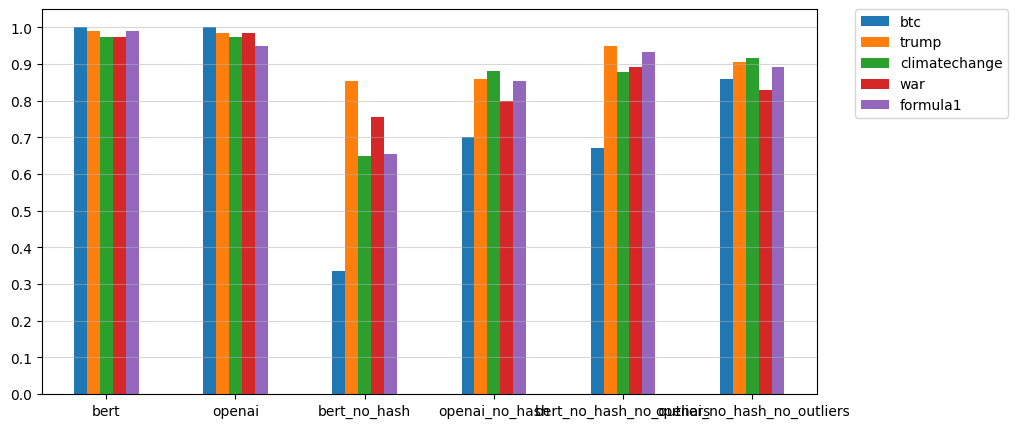

In [5]:
# barplot grouped by column
import matplotlib.pyplot as plt
import numpy as np

df.T.plot.bar(rot=0, figsize=(10,5))

#add grid every 0.1
plt.grid(axis='y', alpha=0.5)

#add yticks every 0.1
plt.yticks(np.arange(0, 1.1, 0.1))

# legend outside 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

            

In [22]:
openai_no_hash.visualize_documents()

In [24]:
bert_no_hash.visualize_documents()

In [30]:
res = df[df['topic'] == 'trump'].value_counts('my_topics')

In [27]:
df = openai_no_hash.df

In [33]:
res.loc[-1]

6

In [32]:
res

my_topics
 2    176
 1     11
-1      6
 3      4
 0      3
dtype: int64

In [3]:
bert_no_hash = Supervised(df_no_hash, 'all-MiniLM-L6-v2')
openai_no_hash = Supervised(df_no_hash, 'openai')

evaluate all-MiniLM-L6-v2
btc 111 89 111
trump 172 28 19
climatechange 129 71 53
war 151 49 32
formula1 199 94 80
evaluate openai
btc 138 62 49
trump 162 38 23
climatechange 162 38 24
war 160 40 12
formula1 250 43 22


<AxesSubplot: xlabel='my_topics', ylabel='topic'>

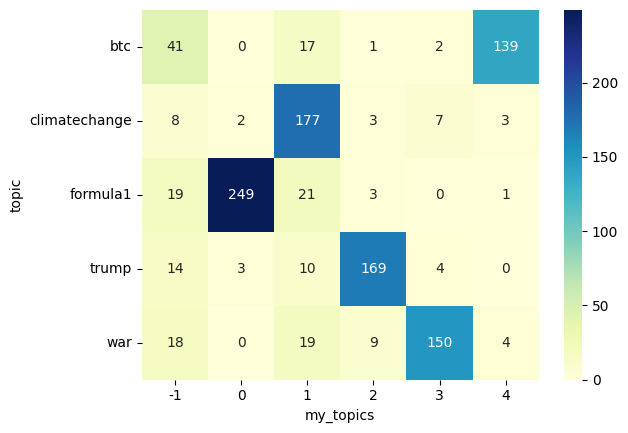

In [5]:
openai_no_hash.visualize_heatmap()

In [7]:
topics = bert_no_hash.df['topic'].unique()
results = {}
results_no_outliers = {}

# compute accuracy for each topic
for topic in topics:
    res = bert_no_hash.df[bert_no_hash.df['topic'] == topic].value_counts('my_topics') 
    # if the biggest label is -1, the second biggest is the right one
    first = res.iloc[0] if res.index[0] != -1 else res.iloc[1]                       # i'm assuming that out of the possible label the right one is the biggest 
    missed = sum(res.iloc[1:]) if res.index[0] != -1 else sum(res) - res.iloc[1]    # sum of the other labels
    outliers = res.loc[-1]

    
    print(topic, first, missed, outliers)
    results[topic] = first / (first + missed)
    results_no_outliers[topic] = first / (first + missed - outliers)  # bertopic mark the outliers with -1, i do not consider them while computing accuracy
        


btc 67 133 111
trump 172 28 19
climatechange 129 71 53
war 151 49 32
formula1 199 94 80


In [9]:
results_no_outliers

{'btc': 0.7528089887640449,
 'trump': 0.9502762430939227,
 'climatechange': 0.8775510204081632,
 'war': 0.8988095238095238,
 'formula1': 0.9342723004694836}

<AxesSubplot: xlabel='my_topics', ylabel='topic'>

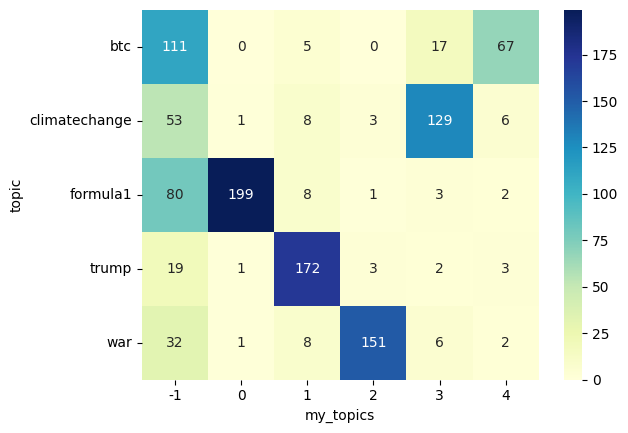

In [6]:
bert_no_hash.visualize_heatmap()